<a href="https://colab.research.google.com/github/dohyeon-kim012/python-1./blob/main/5_25_%EC%8B%9C%EA%B0%81%ED%99%94(Seaborn).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

from scipy.interpolate import splprep, splev

import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib.patches import PathPatch

%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


In [1]:
a = [1, 2, 3, 4]
b = [1, 4, 9, 16]
c = ['kbs', 'mbc', 'sbs', 'ytn']
d = {'이름':'손흥민', '나이':30, '직업':'운동선수', '연봉':200}
s1 = {1, 2, 3, 4}
s2 = {2, 4, 6, 8}    # a, b, c는 list / d는 dict / s1, 2는 set

In [5]:
t1 = np.ndarray(a)
type(t1) , t1    # t1이 사차원 배열로 만들어짐

(numpy.ndarray, array([[[[0.00000000e+000, 9.35434349e+192, 7.62163595e+168,
           1.79257050e+159],
          [1.72310608e+212, 3.82432512e+255, 3.32966217e+178,
           1.16072025e+164],
          [3.32333038e+178, 2.14115095e+183, 7.47637169e-068,
           4.07749375e-087]],
 
         [[3.33203598e+178, 5.06858463e+173, 1.53573408e-154,
           4.13836757e-087],
          [5.88160539e+250, 3.32491328e+178, 4.85242492e+226,
           3.78308530e+255],
          [1.14439638e-072, 6.30416051e-092, 3.86190034e+255,
           1.49166844e-154]]]]))

In [6]:
t2 = np.ndarray(c)    # int아닌 str list로는 ndarray 만들 수 없음

TypeError: ignored

In [8]:
t3 = pd.Series(b)
type(t3) , t3

(pandas.core.series.Series, 0     1
 1     4
 2     9
 3    16
 dtype: int64)

In [9]:
t3.index , t3.values    # Series는 index와 값으로 구성

(RangeIndex(start=0, stop=4, step=1), array([ 1,  4,  9, 16]))

In [11]:
t3.index = ['k', 'b', 'e', 'p']
t3

k     1
b     4
e     9
p    16
dtype: int64

In [12]:
t4 = pd.Series(c)
t4

0    kbs
1    mbc
2    sbs
3    ytn
dtype: object

In [13]:
t5 = pd.Series(d)
t5    # dict를 Series로 바꾸면 좌측 값들(keys)이 index로 들어감

이름     손흥민
나이      30
직업    운동선수
연봉     200
dtype: object

In [14]:
t5.index    # index는 list로 들어감

Index(['이름', '나이', '직업', '연봉'], dtype='object')

In [16]:
t6 = pd.DataFrame(list(d.items()))
t6

,0,1
0,이름,손흥민
1,나이,30
2,직업,운동선수
3,연봉,200


In [17]:
w = {'월':'Montag', '화':'Dienstag', '수':'Mittwoch'}
type(w)

dict

In [19]:
t7 = pd.DataFrame(list(w.items()))
t7.columns = ['Koreanisch', 'Deutsch']
t7

,Koreanisch,Deutsch
0,월,Montag
1,화,Dienstag
2,수,Mittwoch


In [20]:
week = {'0':'Sonntag', '1':'Montag', '2':'Dienstag'}
week.keys(), week.values(), week.items()

(dict_keys(['0', '1', '2']),
 dict_values(['Sonntag', 'Montag', 'Dienstag']),
 dict_items([('0', 'Sonntag'), ('1', 'Montag'), ('2', 'Dienstag')]))

In [22]:
d8 = pd.DataFrame(list(week.items()))
d8

,0,1
0,0,Sonntag
1,1,Montag
2,2,Dienstag


### Seaborn 활용

In [23]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [30]:
type(tips), tips.ndim, tips.describe(), tips.index , tips.columns, tips.size , tips.head(), tips.tail(2)

(pandas.core.frame.DataFrame, 2,        total_bill         tip        size
 count  244.000000  244.000000  244.000000
 mean    19.785943    2.998279    2.569672
 std      8.902412    1.383638    0.951100
 min      3.070000    1.000000    1.000000
 25%     13.347500    2.000000    2.000000
 50%     17.795000    2.900000    2.000000
 75%     24.127500    3.562500    3.000000
 max     50.810000   10.000000    6.000000, RangeIndex(start=0, stop=244, step=1), Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object'), 1708,    total_bill   tip     sex smoker  day    time  size
 0       16.99  1.01  Female     No  Sun  Dinner     2
 1       10.34  1.66    Male     No  Sun  Dinner     3
 2       21.01  3.50    Male     No  Sun  Dinner     3
 3       23.68  3.31    Male     No  Sun  Dinner     2
 4       24.59  3.61  Female     No  Sun  Dinner     4,      total_bill   tip     sex smoker   day    time  size
 242       17.82  1.75    Male     No   Sat  Dinner     2
 243

In [32]:
t = tips.copy()
t.head(3)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


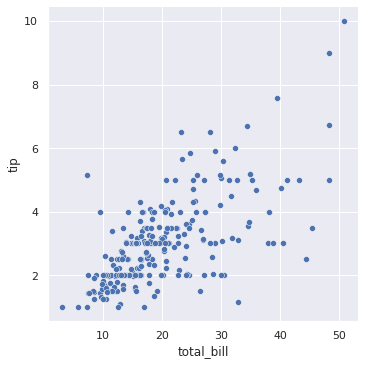

In [35]:
sns.set(style='darkgrid')
sns.relplot(x='total_bill', y='tip', data=t)
plt.show()

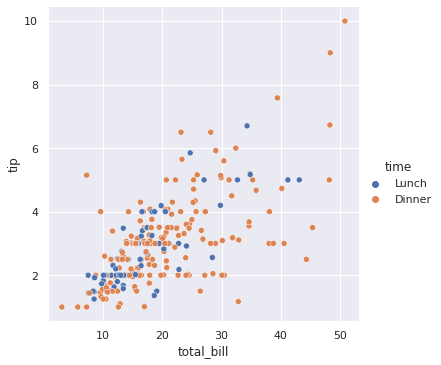

In [41]:
sns.set(style='darkgrid')
sns.relplot(x='total_bill', y='tip', data=t, hue='time')    # rel -> relationship
plt.show()

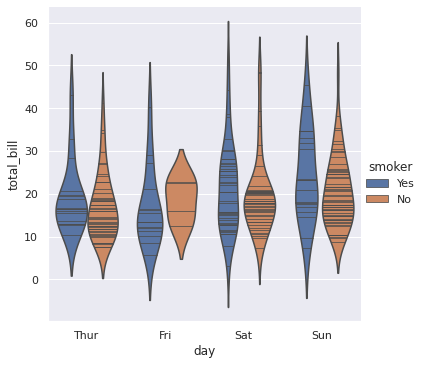

In [55]:
sns.set(style='darkgrid')
sns.catplot(x='day', y='total_bill', data=t, kind='violin', hue='smoker', inner='stick')    # cat -> category
plt.show()    # kind='box' / 'boxen' / ' swarm' / 'bar' / 'point' / 'violin'

### titanic 자료 활용

In [56]:
titanic=sns.load_dataset('titanic')
t=titanic.copy()
t

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


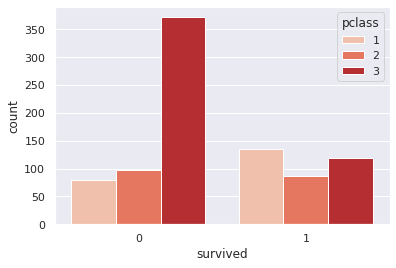

In [62]:
sns.countplot(x='survived', hue='pclass', data=t, palette='Reds')
plt.show()

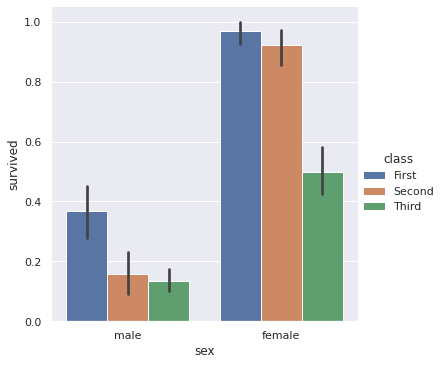

In [68]:
sns.catplot(x='sex', y='survived', hue='class', kind='bar', data=t)
plt.show()

In [70]:
t.shape[0] - t.survived.sum() , t.survived.sum()    # 사망자, 생존자

(549, 342)

In [73]:
t['parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: parch, dtype: int64

In [74]:
t['age'].median()    # 평균 구하기

28.0

In [79]:
k1 = [0, 18, 35, 60, 100]
k2 = ['미성년', '청년', '중장년', '노년']
t['연령대'] = pd.cut(t['age'], bins=k1, labels=k2)
t['연령대'].value_counts()       ## 기준을 줘서 새로운 column 만들기

청년     358
중장년    195
미성년    139
노년      22
Name: 연령대, dtype: int64

In [80]:
t[t['age'] <= 2 ]    # 값 특정해서 검색하기

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,연령대
7,0,3,male,2.00,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False,미성년
16,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,NaN,Queenstown,no,False,미성년
78,1,2,male,0.83,0,2,29.0000,S,Second,child,False,NaN,Southampton,yes,False,미성년
119,0,3,female,2.00,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False,미성년
164,0,3,male,1.00,4,1,39.6875,S,Third,child,False,NaN,Southampton,no,False,미성년
172,1,3,female,1.00,1,1,11.1333,S,Third,child,False,NaN,Southampton,yes,False,미성년
183,1,2,male,1.00,2,1,39.0000,S,Second,child,False,F,Southampton,yes,False,미성년
205,0,3,female,2.00,0,1,10.4625,S,Third,child,False,G,Southampton,no,False,미성년
297,0,1,female,2.00,1,2,151.5500,S,First,child,False,C,Southampton,no,False,미성년
305,1,1,male,0.92,1,2,151.5500,S,First,child,False,C,Southampton,yes,False,미성년


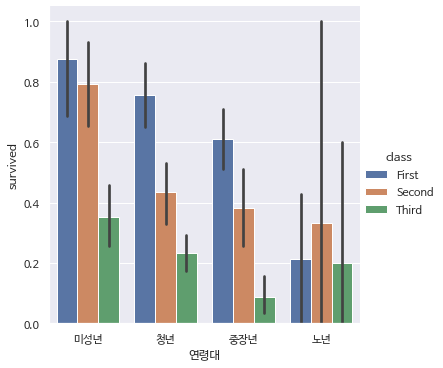

In [83]:
sns.catplot(x='연령대', y='survived', hue='class', kind='bar', data=t)
plt.show()

In [82]:
%matplotlib inline  

import matplotlib as mpl 
import matplotlib.pyplot as plt 
import matplotlib.font_manager as fm  

!apt-get update -qq
!apt-get install fonts-nanum* -qq

path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf' 
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)

fm._rebuild()
mpl.rcParams['axes.unicode_minus'] = False

NanumBarunGothic


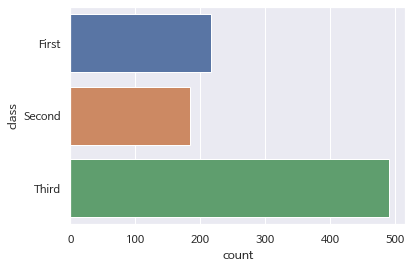

In [84]:
sns.countplot(y='class', data=t)
plt.show()

In [85]:
t.groupby('class').std()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,0.484026,0.0,14.802856,0.611898,0.693997,78.380373,0.498555,0.501140
Second,0.500623,0.0,14.001077,0.601633,0.690963,13.417399,0.499911,0.497081
Third,0.428949,0.0,12.495398,1.374883,0.888861,11.778142,0.477552,0.474233


In [86]:
t.groupby('class')['fare'].median()

class
First     60.2875
Second    14.2500
Third      8.0500
Name: fare, dtype: float64

In [90]:
t.query('alive == "yes"').groupby('class').count()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,who,adult_male,deck,embark_town,alive,alone,연령대
class,,,,,,,,,,,,,,,
First,136,136,136,122,136,136,136,134,136,136,117,134,136,136,122
Second,87,87,87,83,87,87,87,87,87,87,13,87,87,87,83
Third,119,119,119,85,119,119,119,119,119,119,6,119,119,119,85


In [91]:
t.groupby('sex')['age'].aggregate([min, np.median, max])

,min,median,max
sex,,,
female,0.75,27.0,63.0
male,0.42,29.0,80.0


In [97]:
t.query('age > 30').groupby('class').median()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
class,,,,,,,,
First,1,1,45.0,0,0,56.9292,True,False
Second,0,2,39.0,0,0,14.0000,True,True
Third,0,3,38.0,0,0,8.0500,True,True


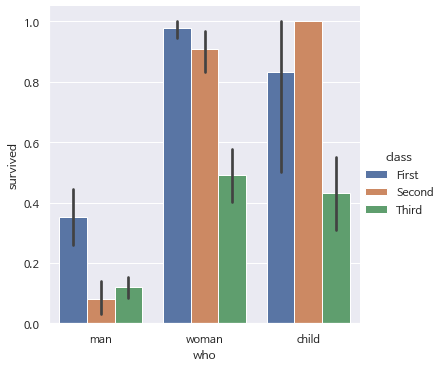

In [101]:
sns.catplot(x='who', y='survived', hue='class', kind='bar', data=t)
plt.show()

In [109]:
age = pd.cut(t['age'], [0, 18, 40, 80])   # cut은 나눌 범위를 정확히 지정할 수 있음
t.pivot_table('survived', ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 40]  0.979167  0.914894  0.480000
       (40, 80]  0.961538  0.846154  0.111111
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 40]  0.478261  0.063492  0.146199
       (40, 80]  0.280000  0.095238  0.064516

In [114]:
age = pd.qcut(t['fare'], 3)    # qcut에서는 정확한 범위를 정할 수 없고, 범위의 개수를 정할 수 있음
t.pivot_table('survived', ['who', age], 'class')

class                     First    Second     Third
who   fare                                         
child (-0.001, 8.662]       NaN       NaN  0.666667
      (8.662, 26.0]         NaN  1.000000  0.703704
      (26.0, 512.329]  0.833333  1.000000  0.080000
man   (-0.001, 8.662]  0.000000  0.000000  0.108333
      (8.662, 26.0]    0.000000  0.103896  0.109375
      (26.0, 512.329]  0.385321  0.000000  0.333333
woman (-0.001, 8.662]       NaN       NaN  0.620000
      (8.662, 26.0]    1.000000  0.888889  0.461538
      (26.0, 512.329]  0.977528  1.000000  0.083333

In [115]:
np.linspace(1, 21, 7)    # 범위를 나눌 개수를 정하고 함수에 값을 넣으면 쉽게 나눌 수 있음 

array([ 1.        ,  4.33333333,  7.66666667, 11.        , 14.33333333,
       17.66666667, 21.        ])

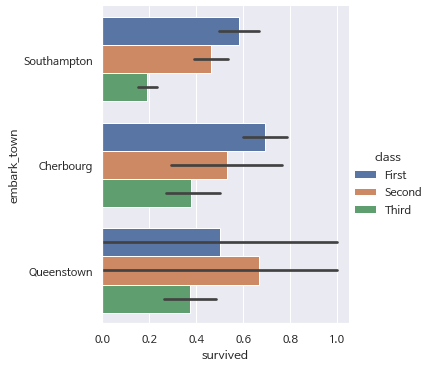

In [116]:
sns.catplot(x='survived', y='embark_town', hue='class', kind='bar', data=t)

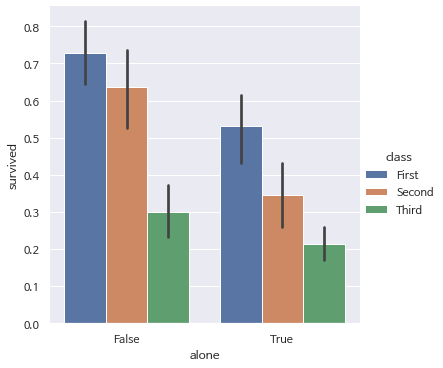

In [119]:
sns.catplot(x='alone', y='survived', hue='class', kind='bar', data=t)